In [418]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://i.imgur.com/b4qvycU.jpg", width=700, height=80) 

### Importando os dados

In [489]:
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # plotagem de dados
import matplotlib.pyplot
import numpy as np # algebra linear
import os # acessar estrutura de diretórios
import pandas as pd # processamento de dados
import seaborn as sns
import csv
import warnings
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

%matplotlib inline


<ul>
 <li>Esse dataset possui a localização, datas, sequenciamentos e outras informações pertinentes as variantes da COVID-19. Apesar do tema dessa análise ser Omicrôn, vamos precisar dos dados de outras variantes para compararmos a evolução dessa mutação em cada país. A base de dados possui os registros mais recentes de novas variantes a fim de proporsionar uma análise mais atual do problema.</li>
 </ul>
 
<blockquote>Esse dataset possui a localização, datas, sequenciamentos e outras informações pertinentes as variantes da COVID-19. Apesar do tema dessa análise ser Omicrôn, vamos precisar dos dados de outras variantes para compararmos a evolução dessa mutação em cada país. A base de dados possui os registros mais recentes de novas variantes a fim de proporsionar uma análise mais atual do problema.</blockquote>


<h2><span style="color:blue">Descrição</span></h2>

<div class="alert alert-block alert-success">
<b>location:</b> este é o país para o qual as informações das variantes são fornecidas;</br>
<b>date:</b> data para a entrada de dados;</br>
<b>variant:</b> esta é a variante correspondente a esta entrada de dados;</br>
<b>num_sequences:</b> o número de sequências processadas (para o país, variante e data)</br>
<b>perc_sequences:</b> percentual de sequências do número total de sequências (para o país, variante e data)</br>
<b>num_sequences_total:</b> número total de sequências (para o país, variante e data)</br>
    
</div>

In [420]:
#df = pd.read_csv("covid-variants.csv")
#df.head(10)

valores_incorretos = ['-','NaN','na','--','.','n/a']
df = pd.read_csv("covid-variants.csv", delimiter=',',na_values=valores_incorretos)
df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


### Verificando nulos e incorretos

In [421]:
df.isnull().sum()

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64

### Definindo o tipo das colunas 

In [422]:
# Conforme observado abaixo, vemos que algumas colunas são tipo object.
# Para não haver conflitos na análise, vamos tipar essas colunas.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [423]:
colunas = ['location', 'date', 'variant']

# Mudando o tipo de dados das colunas por meio do laço For
for index, coluna in enumerate(colunas):
    if index < 1:
        df[f'{coluna}'] = df[f'{coluna}'].astype("string")
    elif index > 0 and index < 2:
        df[f'{coluna}'] = df[f'{coluna}'].values.astype("datetime64")
    else:
        df[f'{coluna}'] = df[f'{coluna}'].astype("string")

In [424]:
# Pronto. Colunas alteradas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   location             100416 non-null  string        
 1   date                 100416 non-null  datetime64[ns]
 2   variant              100416 non-null  string        
 3   num_sequences        100416 non-null  int64         
 4   perc_sequences       100416 non-null  float64       
 5   num_sequences_total  100416 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), string(2)
memory usage: 4.6 MB


### Quais são as variantes a serem analisadas?

In [425]:
df2 = df[['variant']].groupby(['variant']).sum()
df2

""
variant
Alpha
B.1.1.277
B.1.1.302
B.1.1.519
B.1.160
B.1.177
B.1.221
B.1.258
B.1.367


### Quais são os 30 países com maior número de sequenciamentos processados de variantes?

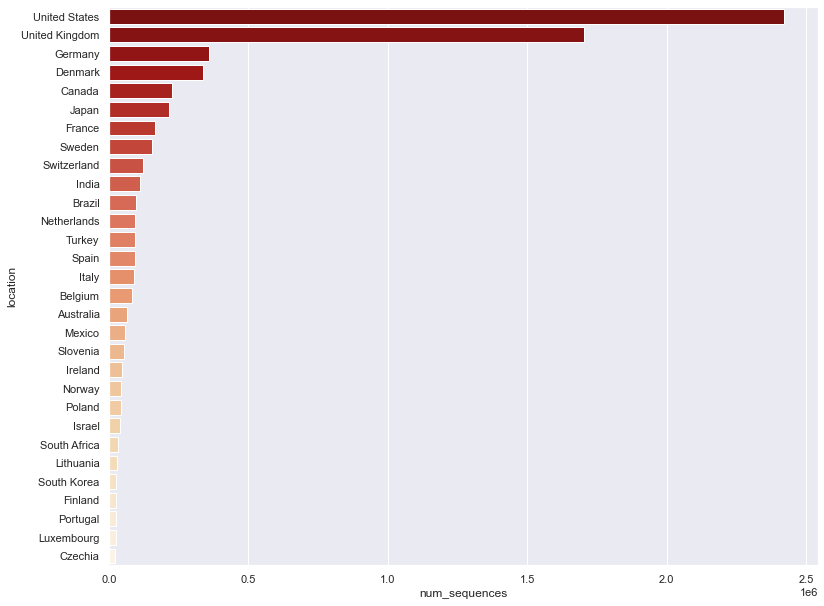

In [499]:
df3=df[['location','num_sequences']].groupby(['location']).sum()
df3 = df3.sort_values('num_sequences',ascending=False)
df3['location'] = df3.index

sns.set(rc={'figure.figsize':(12.7,10.27)})
sns.barplot(y='location', x="num_sequences",order=df3['location'][:30], data=df3, palette="OrRd_r")

paises = df.groupby(['location'])['num_sequences_total'].sum().sort_values(ascending = False).reset_index()


### Mapa global de sequenciamentos totais em todos os períodos

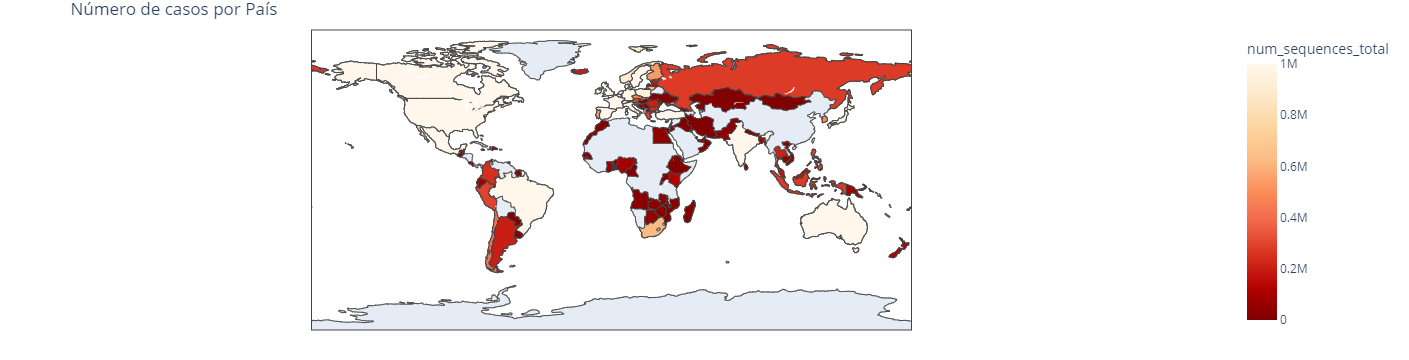

In [527]:
figure = px.choropleth(paises,locations='location', locationmode= 'country names', color= 'num_sequences_total', 
                       hover_name='location', color_continuous_scale='OrRd_r', 
                       range_color=[1,1000000],title='Número de casos por País')
figure.update_layout(margin=dict(l=10, r=10, t=30, b=30))
figure.show()

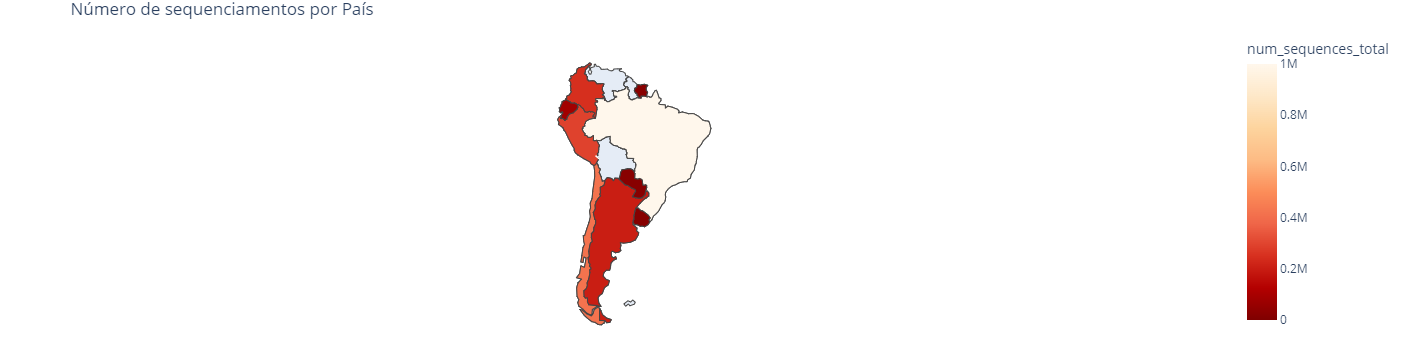

In [548]:
figure = px.choropleth(paises,locations='location', locationmode= 'country names', color= 'num_sequences_total', 
                       hover_name='location', color_continuous_scale='OrRd_r', 
                       range_color=[1,1000000],title='Número de sequenciamentos por País',scope="south america")
figure.update_layout(margin=dict(l=10, r=10, t=30, b=30))
figure.show()

### 10 variantes com maior número de sequenciamentos processados

<AxesSubplot:xlabel='variant', ylabel='num_sequences'>

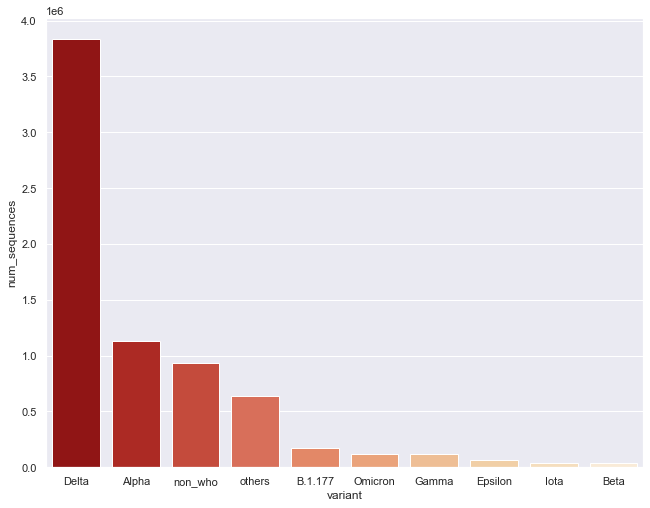

In [477]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
plt.xlim(0, 10000000)
sns.barplot(x='variant', y="num_sequences",order=df1['variant'][:10] ,data=df1, palette="OrRd_r")

### Total de sequenciamentos de Jul/2020 até Jan/2022

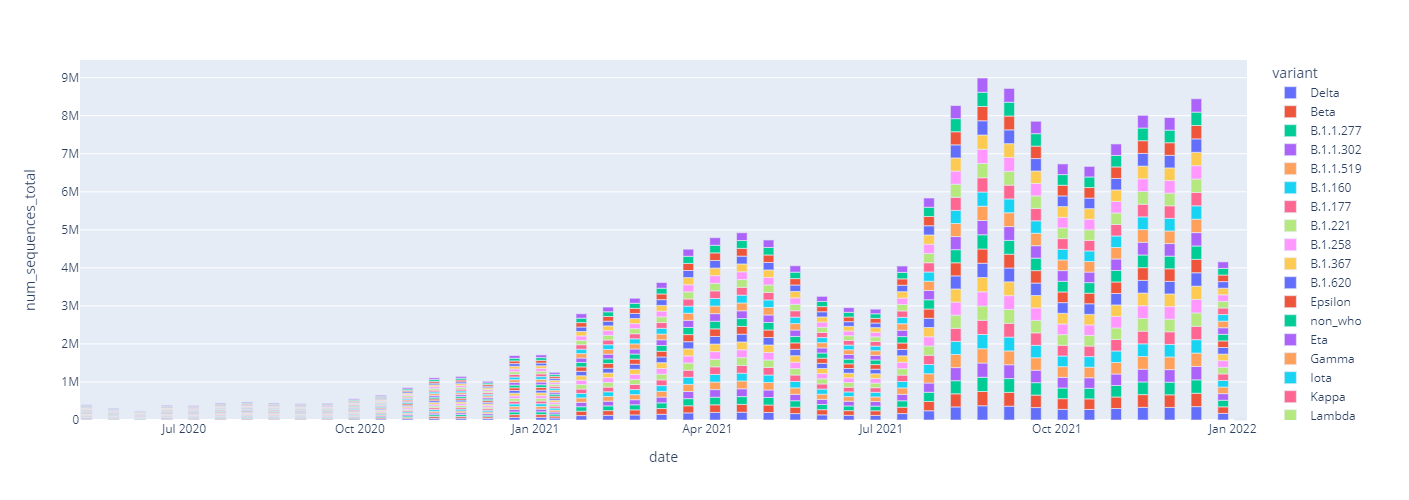

In [547]:
casos = df.groupby(['date', 'variant'])['num_sequences_total'].sum().sort_values(ascending = False).reset_index() 
fig2 = px.bar(casos, x='date', y='num_sequences_total', color="variant",width=1000, height=500)
fig2.show()

In [190]:
#df3 = df.head(10).sort_values('perc_sequences',ascending=False)
df2 = df[['location']].groupby(['location']).sum()

df.filter(['location']).value_counts()

location      
Bangladesh        1080
Belgium           1080
United States     1080
United Kingdom    1080
France            1080
                  ... 
Montenegro         384
Monaco             360
Fiji               336
Benin              336
Brunei             240
Length: 121, dtype: int64

### 5 países com maior número de sequenciamentos de variantes

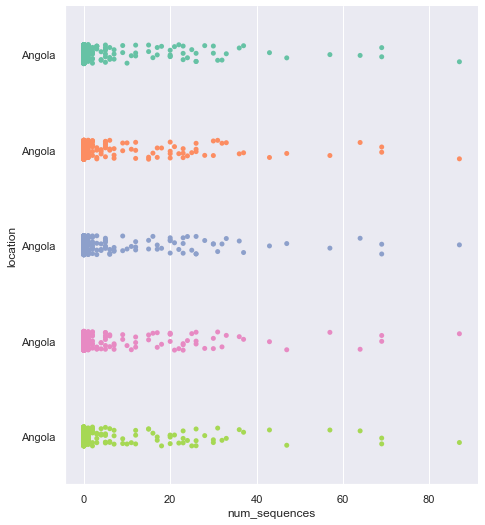

In [485]:
df.sort_values(by='num_sequences', ascending=False)
sns.catplot(x="num_sequences",y="location", palette="Set2", data=df,height=7.27, order=df['location'][:5], aspect=18.7/20.27);